In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter('ignore')

In [26]:
data=pd.read_csv('HR_comma_sep.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [27]:
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [28]:
data["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [29]:
data['salary'] = data['salary'].map({'low':0, 'medium':1, 'high':2})
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,0
14995,0.37,0.48,2,160,3,0,1,0,support,0
14996,0.37,0.53,2,143,3,0,1,0,support,0
14997,0.11,0.96,6,280,4,0,1,0,support,0


In [30]:
le = LabelEncoder()
data['Department'] = le.fit_transform(data['Department'])
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,0
1,0.80,0.86,5,262,6,0,1,0,7,1
2,0.11,0.88,7,272,4,0,1,0,7,1
3,0.72,0.87,5,223,5,0,1,0,7,0
4,0.37,0.52,2,159,3,0,1,0,7,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,0
14995,0.37,0.48,2,160,3,0,1,0,8,0
14996,0.37,0.53,2,143,3,0,1,0,8,0
14997,0.11,0.96,6,280,4,0,1,0,8,0


In [31]:
data['salary'].unique()

array([0, 1, 2])

In [32]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                 int64
salary                     int64
dtype: object

In [33]:
x=data.drop('left',axis=1)
y=data['left'] #Target

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=99)

In [35]:
x_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
2382,0.60,0.60,3,258,3,0,0,7,0
2903,0.30,0.70,5,280,4,1,0,2,0
4974,0.14,0.81,4,138,3,1,0,7,2
8741,0.50,0.67,2,142,3,0,0,9,0
10184,0.20,0.87,3,140,6,1,0,3,0
...,...,...,...,...,...,...,...,...,...
9929,0.92,0.58,5,205,2,1,0,4,1
3240,0.91,0.73,3,155,3,0,0,3,0
13497,0.76,0.82,4,170,6,0,0,7,1
7203,0.66,0.90,3,250,2,0,0,7,0


In [36]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [37]:
model.score(x_train,y_train)

0.803124107057815

In [38]:
model.score(x_test,y_test)

0.7995555555555556

In [39]:
y_pred = model.predict(x_test)

In [40]:
accuracy_score(y_test,y_pred)

0.7995555555555556

In [41]:
cm= confusion_matrix(y_test,y_pred)
cm

array([[3157,  274],
       [ 628,  441]])

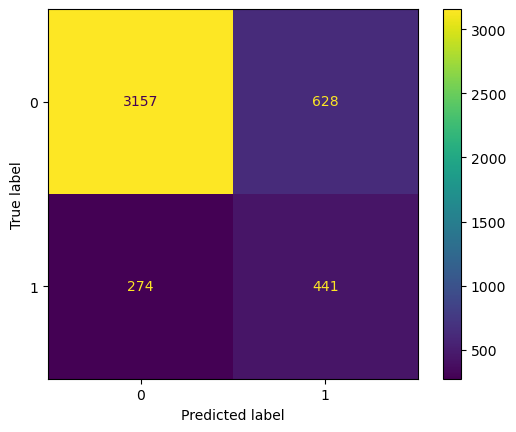

In [42]:
ConfusionMatrixDisplay.from_predictions(y_pred,y_test)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88      3431
           1       0.62      0.41      0.49      1069

    accuracy                           0.80      4500
   macro avg       0.73      0.67      0.68      4500
weighted avg       0.78      0.80      0.78      4500



In [47]:
from sklearn.metrics import roc_curve,auc


In [50]:
y_probs = model.predict_proba(x_test)[:,1]
y_probs

array([0.46480979, 0.07355197, 0.20671087, ..., 0.01204563, 0.04768041,
       0.06452442])

In [51]:
fpr,tpr,thresholds=roc_curve(y_test,y_probs)

In [53]:
#calculating AUC
roc_auc=auc(fpr,tpr)

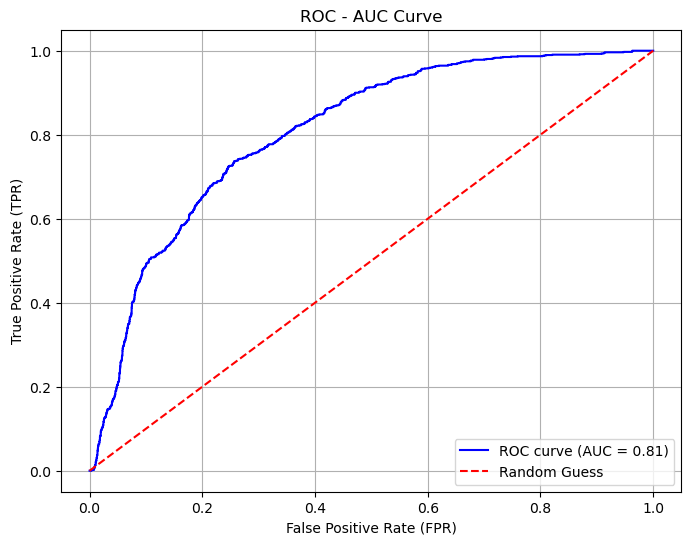

In [56]:
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC - AUC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()